In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Load the dataset
df = pd.read_csv('Iris.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Let's observe the shape of the dataframe.
df.shape

(150, 6)

In [5]:
#Let's create numpy arrays for features and target
X = df.drop('Species',axis=1).values
y = df['Species'].values

In [6]:
#importing train_test_split
from sklearn.model_selection import train_test_split

C:\Users\usr\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=30, stratify=y)

In [26]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

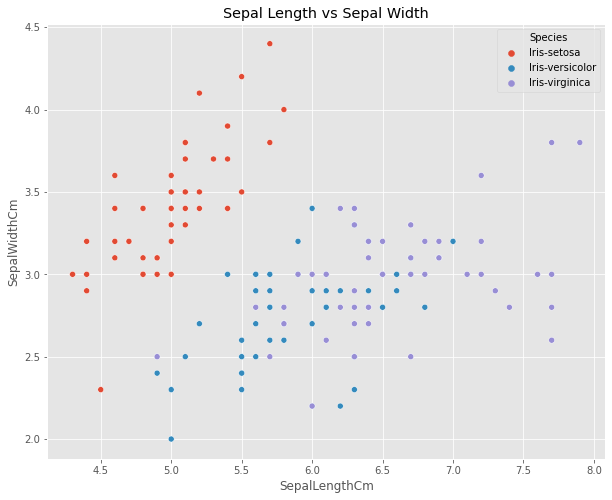

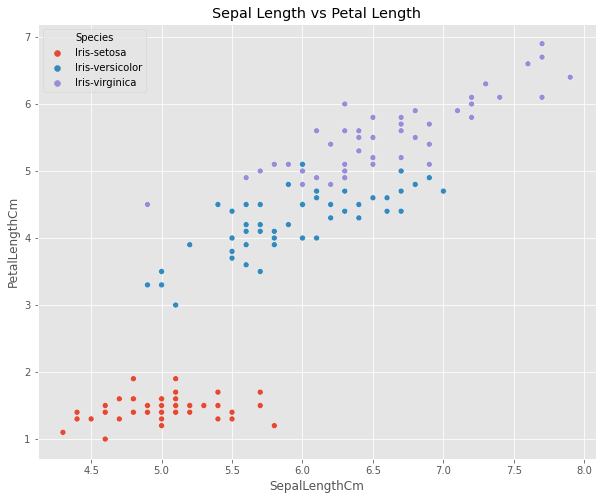

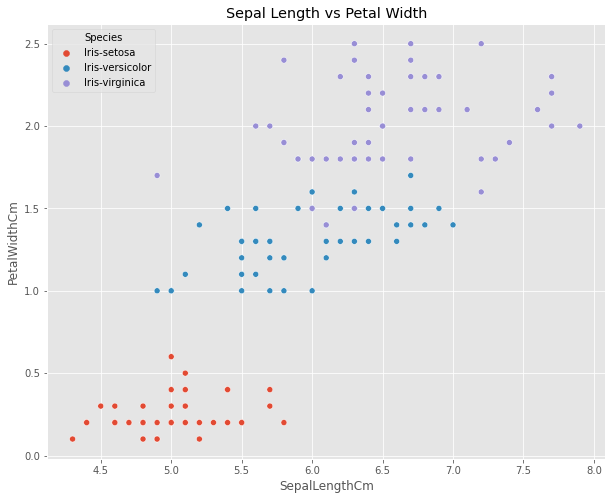

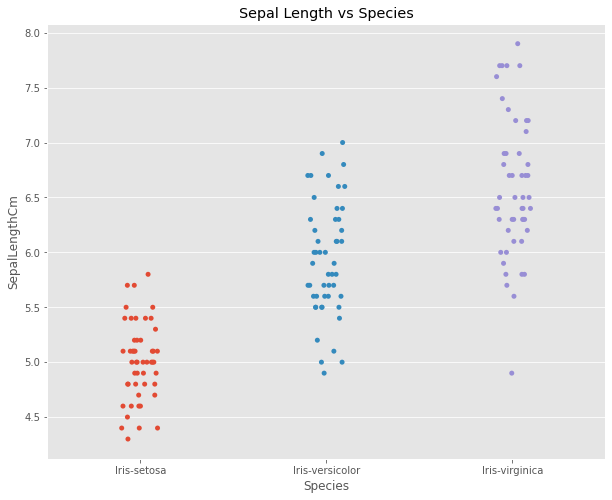

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
iris = pd.read_csv('iris.csv')

# Plot Sepal Length vs Sepal Width
plt.figure(figsize=(10, 8))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Plot Sepal Length vs Petal Length
plt.figure(figsize=(10, 8))
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=iris)
plt.title('Sepal Length vs Petal Length')
plt.show()

# Plot Sepal Length vs Petal Width
plt.figure(figsize=(10, 8))
sns.scatterplot(x='SepalLengthCm', y='PetalWidthCm', hue='Species', data=iris)
plt.title('Sepal Length vs Petal Width')
plt.show()

# Plot Sepal Length vs Species
plt.figure(figsize=(10, 8))
sns.stripplot(x='Species', y='SepalLengthCm', data=iris)
plt.title('Sepal Length vs Species')
plt.show()


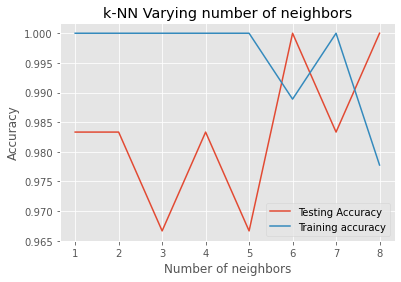

In [27]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [28]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=4)

In [29]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [30]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.9833333333333333

In [31]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.9833333333333333

In [32]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [33]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [34]:
confusion_matrix(y_test,y_pred)

array([[19,  1,  0],
       [ 0, 20,  0],
       [ 0,  0, 20]], dtype=int64)

In [47]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,19,1,0,20
Iris-versicolor,0,20,0,20
Iris-virginica,0,0,20,20
All,19,21,20,60


In [48]:
#import classification_report
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        20
Iris-versicolor       0.95      1.00      0.98        20
 Iris-virginica       1.00      1.00      1.00        20

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



In [50]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [51]:
from sklearn.metrics import roc_curve

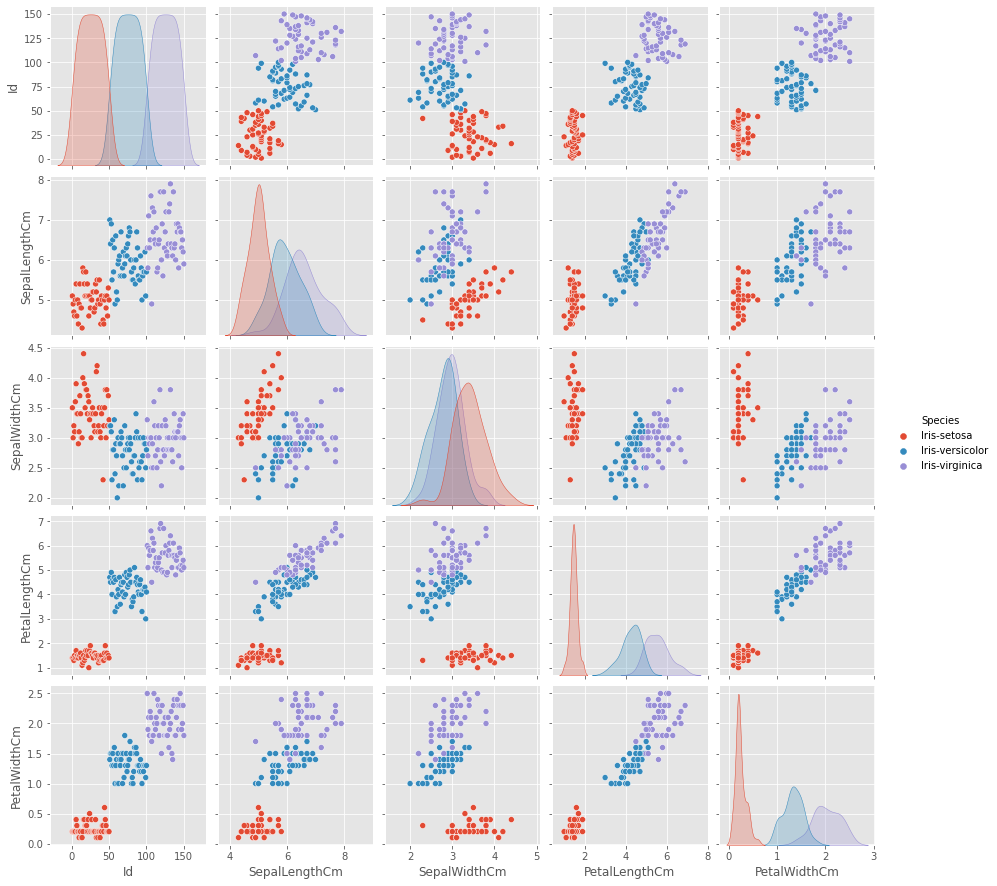

In [61]:
sns.pairplot(df, hue='Species')

In [62]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [63]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [64]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [65]:
knn_cv.best_score_

0.8799999999999999

In [66]:
knn_cv.best_params_

{'n_neighbors': 2}